In [1]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from scipy import stats
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
import seaborn as sns


In [2]:
#load the dataset
df = pd.read_csv('clean_kaggle_data_2021.csv')
df

/Users/qin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,284,285,286,287,288,289,290,291,292) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER,Q25_Encoded,Q25_buckets
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",NaN,NaN
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"20,000-29,999"
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,6.0,"60,000-69,999"
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,3.0,"30,000-39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,323,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"0-9,999"
15388,910,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,"80,000-89,999"
15389,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,"10,000-19,999"
15390,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0,"0-9,999"


In [3]:
# Clean data
# First, drop the first column which has no relation with salary, and also column "Q25" and "Q25_buckets" since we only need 
# "Q25_Encoded" for later analysis
df = df.drop(["Time from Start to Finish (seconds)", "Q25", "Q25_buckets"], axis=1)

# Change all "Other" value in the dataframe to missing value
df.replace({"Other": np.nan}, inplace=True)
# Change some blurry answers to nan in the gennder column
df["Q2"].replace({"Pefer not to say": np.nan, 'Prefer to self-describe': np.nan}, inplace=True)

# then, since all selections and parts related with "Q27B", "Q29B", "Q30B", "Q31B", "Q32B", "Q34B", "Q36B", "Q37B" 
# and "Q38B" are asking about features about future two years, which seems to have very weak relation with our target 
# variable salary, so we drop these columns first (get rid of column 266 to 366)
df = pd.concat([df.iloc[:, 0:266], df.iloc[:, 367]], axis=1)
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,...,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q25_Encoded
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,NaN
1,50-54,Man,India,Bachelor’s degree,NaN,5-10 years,Python,R,NaN,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,2.0
2,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,C,...,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,6.0
3,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,30-34,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,NaN,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15388,35-39,Man,South Korea,Bachelor’s degree,Software Engineer,5-10 years,Python,NaN,SQL,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,8.0
15389,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN,1.0
15390,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,0.0


In [4]:
# calculate total numbers of answers for select all apply questions
df_mc = df.copy()
df_mc = df_mc.iloc[1:,:]
df_mc_sum = pd.DataFrame()

df_q7 = pd.get_dummies(df_mc.iloc[:,6:19])
df_mc_sum['Q7']=df_q7.sum(axis=1)

df_q9 = pd.get_dummies(df_mc.iloc[:,20:32])
df_mc_sum['Q9']=df_q9.sum(axis=1)

df_q10 = pd.get_dummies(df_mc.iloc[:,33:49])
df_mc_sum['Q10']=df_q10.sum(axis=1)

df_q12 = pd.get_dummies(df_mc.iloc[:,51:56])
df_mc_sum['Q12']=df_q12.sum(axis=1)

df_q14 = pd.get_dummies(df_mc.iloc[:,58:69])
df_mc_sum['Q14']=df_q14.sum(axis=1)

df_q16 = pd.get_dummies(df_mc.iloc[:,71:88])
df_mc_sum['Q16']=df_q16.sum(axis=1)

df_q18 = pd.get_dummies(df_mc.iloc[:,101:107])
df_mc_sum['Q18']=df_q18.sum(axis=1)

df_q19 = pd.get_dummies(df_mc.iloc[:,108:113])
df_mc_sum['Q19']=df_q19.sum(axis=1)

df_q24 = pd.get_dummies(df_mc.iloc[:,118:125])
df_mc_sum['Q24']=df_q24.sum(axis=1)

df_q27 = pd.get_dummies(df_mc.iloc[:,127:138])
df_mc_sum['Q27A']=df_q27.sum(axis=1)

df_q29 = pd.get_dummies(df_mc.iloc[:,140:144])
df_mc_sum['Q29A']=df_q29.sum(axis=1)

df_q30 = pd.get_dummies(df_mc.iloc[:,145:152])
df_mc_sum['Q30A']=df_q30.sum(axis=1)

df_q31 = pd.get_dummies(df_mc.iloc[:,153:162])
df_mc_sum['Q31A']=df_q31.sum(axis=1)

df_q32 = pd.get_dummies(df_mc.iloc[:,163:182])
df_mc_sum['Q32A']=df_q32.sum(axis=1)

df_q34 = pd.get_dummies(df_mc.iloc[:,185:201])
df_mc_sum['Q34A']=df_q34.sum(axis=1)

df_q36 = pd.get_dummies(df_mc.iloc[:,203:210])
df_mc_sum['Q36A']=df_q36.sum(axis=1)

df_q37 = pd.get_dummies(df_mc.iloc[:,211:218])
df_mc_sum['Q37A']=df_q37.sum(axis=1)

df_q38 = pd.get_dummies(df_mc.iloc[:,219:230])
df_mc_sum['Q38A']=df_q38.sum(axis=1)

df_q39 = pd.get_dummies(df_mc.iloc[:,231:240])
df_mc_sum['Q39']=df_q39.sum(axis=1)

df_q40 = pd.get_dummies(df_mc.iloc[:,241:252])
df_mc_sum['Q40']=df_q40.sum(axis=1)

df_q42 = pd.get_dummies(df_mc.iloc[:,254:265])
df_mc_sum['Q42']=df_q42.sum(axis=1)

df_mc_sum

,Q7,Q9,Q10,Q12,Q14,Q16,Q18,Q19,Q24,Q27A,...,Q30A,Q31A,Q32A,Q34A,Q36A,Q37A,Q38A,Q39,Q40,Q42
1,2,1,1,1,5,3,1,1,1,1,...,1,1,1,1,1,0,1,2,6,6
2,4,2,2,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,3,1
3,3,2,1,0,1,0,0,0,1,1,...,0,1,2,1,1,0,1,1,1,2
4,1,2,1,1,1,3,4,1,1,0,...,0,0,0,0,0,0,0,0,2,3
5,3,3,1,1,3,3,0,0,2,1,...,1,1,0,1,1,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,2,2,1,2,3,5,5,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15388,3,2,2,1,1,2,0,0,2,4,...,3,1,3,1,1,0,1,2,1,3
15389,4,4,4,1,2,6,3,0,2,2,...,2,2,5,1,1,0,1,2,7,3
15390,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,1


In [5]:
# get rid of columns have more than 8000 null values, which is approximately half of the sample
print("We will not cotain all parts from following questions:")
for i in range(21):
    if ((df_mc_sum[df_mc_sum.columns[i]] == 0).sum() >= 8000):
        print(df_mc_sum.columns[i])
print("since they contain too many missing values.")

We will not cotain all parts from following questions:
Q18
Q19
Q29A
Q30A
Q32A
Q37A
since they contain too many missing values.


We can see in all multiple choices that select all apply, questions in above columns has more than 8000 missing values, so we will drop these columns. The possible reason may be Question 18 and 19 were only asked to respondents that selected the relevant answer choices for Question 17. Question 29-A and 30-A were only asked to respondents that selected more than one choice for Question 27-A.

In [6]:
# find the total missing value for single answer questions
# and select columns with less than 8000 nan (drop columns with too many missing values)
df1 = df.copy()
df1 = df1.loc[:, (df1.isnull().sum(axis=0) <= 8000)]
# get rid of select all apply questions
df1 = df1.drop(['Q7_Part_1',  'Q9_Part_11', 'Q12_Part_5',  'Q14_Part_1', 'Q14_Part_2','Q16_Part_1', 'Q17_Part_1', 'Q17_Part_2','Q24_Part_1','Q42_Part_4'], axis=1)
# get rid of first row-detailed questions
df1 = df1.iloc[1:,:]
#df1
print(df1.columns)

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q8', 'Q11', 'Q13', 'Q15', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q26', 'Q41', 'Q25_Encoded'],
      dtype='object')


Based on the above results, we can see in all multiple choices with one answer, only "Q28"(Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)), "Q33" (Which of the following big data products (relational database, data warehouse, data lake, or similar) do you use most often?) and "Q35" (Which of the following business intelligence tools do you use most often?) has more than 8000 missing values, so we will drop this column. The possible reason is Question 28, 33 and 35 was only asked to respondents that selected more than one choice for Question 27-A, 32-A and 34-A respectively. By the way, Question 32-A already had too many missing values.

In [7]:
# encode df1: change categorical variables to numerical 

for i in range(16):
    df1[df1.columns[i]]= pd.factorize(df1[df1.columns[i]])[0]

##df1['Q1'] = pd.factorize(df1['Q1'])[0]
#print(df1["Q41"].value_counts(),df["Q41"].value_counts())
df1

,Q1,Q2,Q3,Q4,Q5,Q6,Q8,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26,Q41,Q25_Encoded
1,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,2.0
2,0,0,1,1,0,1,0,1,1,1,0,1,1,1,1,1,6.0
3,1,0,2,1,1,2,0,0,1,2,1,1,2,2,1,2,0.0
4,2,0,3,2,2,1,0,1,2,0,1,1,2,2,1,0,3.0
5,2,0,0,2,-1,3,0,1,1,3,1,0,3,3,2,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,3,0,0,0,4,2,0,1,3,5,0,2,5,4,0,-1,0.0
15388,5,0,43,0,1,0,0,2,0,7,2,2,5,3,4,4,8.0
15389,3,0,9,0,4,2,0,0,1,5,2,2,5,1,2,3,1.0
15390,0,0,29,2,2,6,-1,-1,-1,-1,1,1,5,2,3,2,0.0


In [8]:
# df for all selected select-all-apply questions
df_selectall= pd.concat([df_q7,df_q9,df_q10,df_q12,df_q14,df_q16,df_q24,df_q27,df_q31,df_q34,df_q36,df_q38,df_q39,df_q40,df_q42], axis=1)
df_selectall
# combine dfs together to get clean df with all variables numerical
df_clean = pd.concat([df_selectall, df1], axis=1)
df_clean

,Q7_Part_1_Python,Q7_Part_2_R,Q7_Part_3_SQL,Q7_Part_4_C,Q7_Part_5_C++,Q7_Part_6_Java,Q7_Part_7_Javascript,Q7_Part_8_Julia,Q7_Part_9_Swift,Q7_Part_10_Bash,...,Q11,Q13,Q15,Q20,Q21,Q22,Q23,Q26,Q41,Q25_Encoded
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.0
2,0,0,1,1,1,1,0,0,0,0,...,1,1,1,0,1,1,1,1,1,6.0
3,1,0,0,0,1,1,0,0,0,0,...,0,1,2,1,1,2,2,1,2,0.0
4,1,0,0,0,0,0,0,0,0,0,...,1,2,0,1,1,2,2,1,0,3.0
5,1,0,0,1,0,0,0,0,0,0,...,1,1,3,1,0,3,3,2,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15387,1,0,0,1,0,0,0,0,0,0,...,1,3,5,0,2,5,4,0,-1,0.0
15388,1,0,1,0,0,0,0,0,0,1,...,2,0,7,2,2,5,3,4,4,8.0
15389,1,0,1,0,0,0,1,0,0,1,...,0,1,5,2,2,5,1,2,3,1.0
15390,0,0,0,0,0,0,0,0,0,0,...,-1,-1,-1,1,1,5,2,3,2,0.0


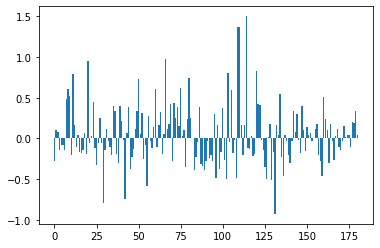

Here the threshold is set at +-0.1 to avoid low coefficients that has minor influence on the target value, and we got the following list of important features: 
Q7_Part_1_Python Score: -0.28290
Q7_Part_4_C Score: -0.14483
Q7_Part_7_Javascript Score: -0.14779
Q7_Part_8_Julia Score: 0.48023
Q7_Part_9_Swift Score: 0.60580
Q7_Part_10_Bash Score: 0.51654
Q7_Part_11_MATLAB Score: -0.20341
Q7_Part_12_None Score: 0.79621
Q9_Part_1_Jupyter (JupyterLab, Jupyter Notebooks, etc)  Score: 0.16168
Q9_Part_2_ RStudio  Score: -0.10919
Q9_Part_4_ Visual Studio Code (VSCode)  Score: -0.16357
Q9_Part_5_ PyCharm  Score: -0.18217
Q9_Part_6_  Spyder   Score: -0.13900
Q9_Part_8_  Sublime Text   Score: -0.18705
Q9_Part_9_  Vim / Emacs   Score: 0.95482
Q9_Part_12_None Score: 0.45191
Q10_Part_1_ Kaggle Notebooks Score: -0.12048
Q10_Part_2_Colab Notebooks Score: -0.32564
Q10_Part_4_ Paperspace / Gradient  Score: 0.25664
Q10_Part_6_ Code Ocean  Score: -0.79374
Q10_Part_7_ IBM Watson Studio  Score: -0.14279
Q10_Par

In [9]:
X = df_clean.iloc[:, :181]
y = df_clean.iloc[:, -1]
# define the linear model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
print("Here the threshold is set at +-0.1 to avoid low coefficients that has minor influence on the target value, and we got the following list of important features: ")
# summarize feature importance
result = zip(list(df_clean.columns), list(importance))
important_feature=[]
for i,v in result:
    if v>0.1 or v<-0.1:
        important_feature.append(str(i))
        print(str(i) + ' Score: %.5f' % v)

#for i in range(130):
#    d1=(df_clean[important_feature[i]] == 1).sum()
#    d2=(df_clean[important_feature[i]] == 0).sum()
#    if d1>d2:
#        print(important_feature[i])

Since there are too much missing value in some parts of select-all questions taken into account, which will cause large variance, so we will select these features: Q2, Q4, Q5, Q6, Q11, Q21, Q22, Q23, Q26, Q7_Part_1_Python, Q14_Part_1_ Matplotlib, Q14_Part_2_ Seaborn, Q16_Part_1_  Scikit-learn, Q24_Part_1_Analyze and understand data to influence product or business decisions, Q42_Part_4_Kaggle (notebooks, forums, etc).

In [25]:
features = df_clean[["Q2", "Q4", "Q5", "Q6", "Q11", "Q21","Q22", "Q23", "Q26", "Q7_Part_1_Python", "Q14_Part_1_ Matplotlib ", "Q14_Part_2_ Seaborn ", "Q16_Part_1_  Scikit-learn ", "Q24_Part_1_Analyze and understand data to influence product or business decisions", "Q42_Part_4_Kaggle (notebooks, forums, etc)"]]
target = df_clean['Q25_Encoded']
#split the data
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()    
model.fit(X_train, y_train)
#get accuracy of model on training set
predictions = model.predict(X_test)
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("The accuracy of this model is {}%.".format(round(ACC*100,2))) 

The accuracy of this model is 83.01%.


In [11]:
#10-fold cross-validation
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test, y_train, y_test = X.values[train_idx], X.values[test_idx], y.values[train_idx], y.values[test_idx]                                          
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    print ("Fold {}: Accuracy={}".format(np_idx, round(ACC,3)))   

print ("Average accuracy={}%, Variance of accuracy={}".format(round(np.mean(accuracy),2),round(np.std(accuracy),2)))

Fold 1: Accuracy=0.82
Fold 2: Accuracy=0.82
Fold 3: Accuracy=0.806
Fold 4: Accuracy=0.831
Fold 5: Accuracy=0.823
Fold 6: Accuracy=0.855
Fold 7: Accuracy=0.811
Fold 8: Accuracy=0.815
Fold 9: Accuracy=0.814
Fold 10: Accuracy=0.827
Average accuracy=82.23%, Variance of accuracy=1.29


In [12]:
#Model tuning
best_model = model
best_params = {}
best_accuracy = 0
best_std = 0

for C in [0.001,0.01,0.1,1,10, 100]:
    for solver in ['newton-cg','lbfgs','liblinear','sag']:
        model = LogisticRegression(C=C, solver=solver)
        accuracy = np.zeros(10)
        np_idx = 0
        
        for train_idx, test_idx in kfold.split(X):
            X_train, X_test = X.values[train_idx], X.values[test_idx]
            y_train, y_test = y.values[train_idx], y.values[test_idx]
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            model.fit(X_train, y_train)

            predictions = model.predict(X_test)

            TN = confusion_matrix(y_test, predictions)[0][0]
            FP = confusion_matrix(y_test, predictions)[0][1]
            FN = confusion_matrix(y_test, predictions)[1][0]
            TP = confusion_matrix(y_test, predictions)[1][1]
            total = TN + FP + FN + TP
            ACC = (TP + TN) / float(total)

            accuracy[np_idx] = ACC*100
            np_idx += 1
        
        if np.mean(accuracy) > best_accuracy:
            best_model = model
            best_params = {'C':C, 'solver':solver}
            best_accuracy = np.mean(accuracy)
            best_std = np.std(accuracy)

print ("Best Score: {}%({})".format(round(best_accuracy,2),round(best_std,2)))      
print ("\nThe optimal logistic model uses C={} with a {} solver, and has a cross validation score of {}% with a standard deviation of {}.".format(best_params['C'],best_params['solver'],round(best_accuracy,2),round(best_std,2)))



Best Score: 82.26%(1.27)

The optimal logistic model uses C=0.001 with a liblinear solver, and has a cross validation score of 82.26% with a standard deviation of 1.27.


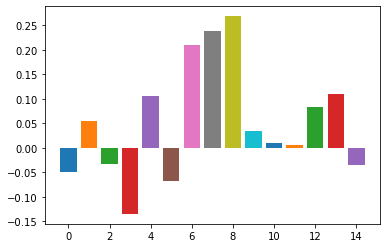

In [13]:
model = LogisticRegression(solver='liblinear', C=0.001)
model.fit(X_train, y_train)
# get importance
importance_log = []
for i in range(15):
    importance_log.append(np.corrcoef(X_train[:,i], y_train))
imp_arr=np.array(importance_log)
# plot feature importance
for x in range(len(importance_log)):
    #plt.bar(x, np.mean(importance_log[:,x]))
    plt.bar(x, np.mean(imp_arr[x][1][0]))
plt.show()

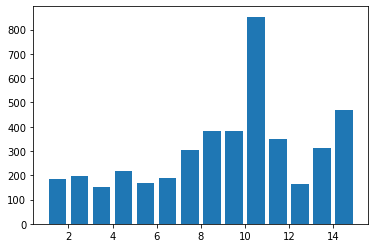

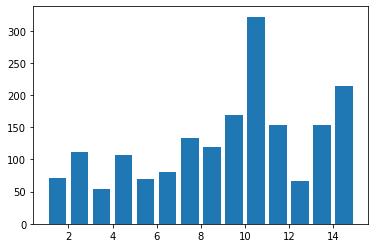

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
# generate regression dataset
X = features
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)
model = LogisticRegression(solver='liblinear', C=0.001)
model.fit(X_train, y_train)
model.fit(X_test, y_test)
#train set
Xnew, _ = make_regression(n_samples=len(X_train), n_features=15, random_state=1)
#test set
Xtestnew, _ = make_regression(n_samples=len(X_test), n_features=15, random_state=1)

# make a prediction
ynew = model.predict(Xnew)
ytestnew = model.predict(Xtestnew)
#histogram
bins=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.hist(ynew-y_train,bins, histtype='bar', rwidth=0.8)
plt.show()
plt.hist(ytestnew-y_test,bins, histtype='bar', rwidth=0.8)
plt.show()